<a href="https://colab.research.google.com/github/BeBrave-BeHumble/Computer_Vision_ADVANCED/blob/main/w1_0928_%EB%85%BC%EB%AC%B8%EB%A6%AC%EB%B7%B02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [2015 최초 인간을 뛰어넘은 모델 ] Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification

* ResNet 저자와 완전히  순위까지 똑같음. 사실 ResNet 이전에 인간을 뛰어넘은 모델이 있었음. parametric ReLU라는 기법을 통해서 인간의 classification 능력을 뛰어넘음. 그런데 비공식이라 ResNet이 인간을 뛰어넘었다고 알려짐. 

* AlexNet이 ReLU를 적극적으로 도입해서 표준처럼 사용하고 있는데, Dying ReLU 문제점을 개선한 모델들이 몇 개 있었음

  - Leaky ReLU (2014): 음수 값이 들어오면 0은 아니고 아~주 작게 0이 안 되게 만들어서 음수도 값을 살리는 기법. 
  - YOLO: YOLO도 Linear activation으로 Leaky ReLU를 사용함.


* 이 논문은 ReLU를 두 가지 관점으로 개선함

    **1) parametric ReLU (=PReLU)**: 0으로 만드는 대신 학습을 통해 최적의 값을 찾자! 1/100을 alpha로 두고 상황(학습)에 따라 alpha를 찾음. 즉, ReLU의 일반화. (Leaky ReLU를 파라미터화 시킨 느낌)

    ReLU는 미분할 때 비용이 아주 작게 들기 때문에 학습이 빠르단 것이 장점이었음. 얘도 역시 Leaky ReLU처럼 0보다 작은 범위를 alpha x로 만들어서 거의 비용이 들지 않게 함. 또한 Overfitting 문제도 어느정도 해결함.

    **2) Robust Initialization method:** 초기값에 따라 학습 속도와 수렴 여부가 굉장히 영향을 많이 받았었음. ReLU의 문제점이었던 Numerical stability(결과를 보장하는 성질)을 보장하기 위해 Initialization method를 PReLU 전용으로 맞춤. 그래서 deep하게 ReLU만 사용한 모델에서 성능을 내게 함.

  텐서플로와 파이토치의 Conv2D와 Dense에서 glorot_uniform이라고 디폴트로 세팅되어 있음. 이미 우리가 사용 중임. 

  => 이 두개만 바꿔도 Deep하게 바꿀 수 있었고, 인간을 뛰어넘었다. GoogLeNet보다 성능이 더 좋았음. 4.94%로 인간을 뛰어넘음. 하지만 우리는 ReLU가 완벽하지 않다는 것에 공감대를 가지고 있어야함.

* 알파를 찾기 위해 학습한 결과 보니까 딥해질수록 알파가 점점 작아지더라. alpha가 크다가 작아진다는 것은 함수가 linear에 가깝다가(x=y) 점점 non-linear로 변한다는 뜻임. (relu 형태)

  이전 포스팅에서 ZFNet 초반에는 간단한 형태의 점, 선, 면 피처를 디텍션하고 뒤로 갈수록 복잡한 형태의 non-linearity 피처를 디텍션한다고 했는데 그것과 일맥상통하는 내용이었음! 즉, 뉴럴네트워크가 딥하면 딥할수록 엄청나게 복잡한 형태를 분류시킬 때도 non-linearity가 누적되어 데이터를 구분하기 때문에 non-linearity가 중요하며 딥할수록 잘 구분해낸다.

  -> 이론적인 내용이 틀리지 않았다. (그런데 이 논문에서도 어느정도 딥해지면 성능이 떨어지긴 했음)



# [2015년 Rethinking Inception] Rethinking the Inception Architecture for Computer Vision

* Inception 저자와 BN 저자가 만남. Parametric ReLU가 인간을 뛰어넘었지만 비공식적이었음. 2015년 ResNet이 공식적으로 뛰어넘었는데, 이 때 Shortcut connection(Residual block)과 BN을 사용했음.
* 2014년 Inception 당시 'nxn conv' & 'deep한 정도'의 시사점이 있었다고 했음. 그리고 layer를 20개 이상 쌓지 못해서 인간을 아주 뛰어넘는 성능을 내긴 힘들었음.

  따라서 InceptionV2는 효율성을 위해 연산량을 줄이고(VGG기법), 성능도 보장함 (regularization = BN). 하지만 이것만으론 안타깝게 인간을 뛰어넘진 못했는데, 앙상블을 했더니 인간을 뛰어넘음. 그 과정을 알아보자


**개선1) Factorization into smaller convolutions (VGG's efficience)**

conv 3x3을 두 번 하면 conv 5x5와 똑같고, conv 3x3 세 번 하면 conv 7x7와 똑같지만 파라미터가 훨씬 적다고 했음. => Inception에서는 conv 5x5 썼지만 conv 3x3 두 번 써서 파라미터 줄여 효율성 높이자.

Factorizing: 3x3 연산은 3x1 x 1x3으로 쪼갤 수 있는데, 이런 VGG의 팩토라이징기법을 사용함.

In [ ]:
import numpy as np

In [ ]:
# meshgrid 기법 
a, b = np.meshgrid([1,2,3], [1,2,3])

In [ ]:
a+b

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [ ]:
# mgrid 기법. meshgrid보다 더 빠른 속도
a, b = np.mgrid[1:4, 1:4]
print(a)
print()
print(b)

[[1 1 1]
 [2 2 2]
 [3 3 3]]

[[1 2 3]
 [1 2 3]
 [1 2 3]]


In [ ]:
a+b

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

In [ ]:
# ogrid 기법. mgrid보다 더 빠른 속도
a, b = np.ogrid[1:4, 1:4]
print(a)
print()
print(b)

[[1]
 [2]
 [3]]

[[1 2 3]]


In [ ]:
a+b

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

이런 식으로 결과는 같지만 연산 속도를 끌어올림

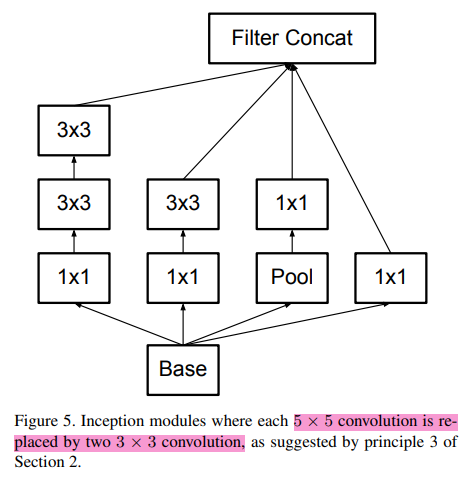

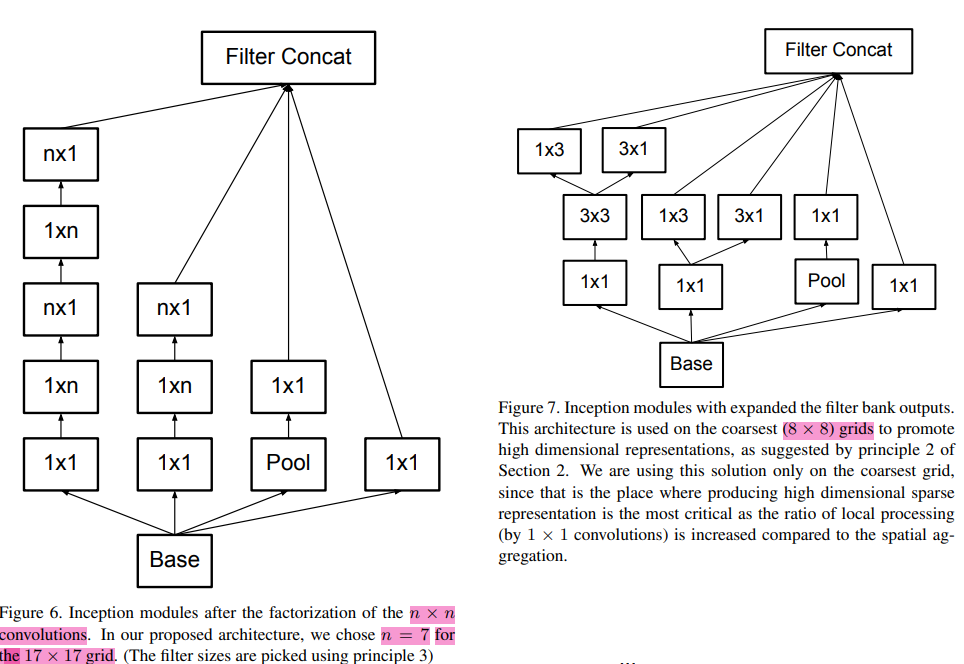



---



**개선2) Auxiliary classifier 쓰지 말자**

학습 잘 안 될까봐 붙여둔 보조 layer가 약간 성능이 좋았지만 큰 도움이 없었다. (plateau했다)

=> 그래서 BN를 만들었다.




---



**개선3) Efficient Grid Size Reduction (풀링연산)**
* 전통적으로 CNN은 feature map의 사이즈를 줄이기 위해 풀링맵을 사용. 그런데 이 grid size가 줄면 표현력 (representational bottleneck)이 줄어듦. 5x5이 담는 정보보다 11x11이 담는 정보가 더 많다는 뜻. 
* 현대에는 풀링 안 쓰는 기법이 엄청 나오고 있는데, 이 풀링을 쓰지 말자는 논문이 striving for simplicity(2014)에 나옴. stride를 크게 써도 풀링 효과가 나더라는 논문. 특히 표현력이 중요한 VAE, GAN에서는 풀링을 안 쓰는 게 더 표현력이 좋다. 그러나 파라미터가 너무 많은데 그만큼 데이터 확보를 못해서 overfitting 난 경우 풀링이 필요하다.

  하지만, 줄일 때 overlapping해서 가능한 숨어있는 정보를 유지하며 효율적으로 줄이자. => AlexNet의 overlapping pooling.

  max또는 avg 풀링 사용하기 전에 네트워크 필터의 디멘션을 확장시키자. 1x1 conv 사용해서 dim 768로 확장. 그리고 나서 풀링연산을 하면 이론상 조금 더 정보가 살아남는다. 참 쓸데없는 짓인데 이 때부터 이런 기법들이 나옴.

  (35x35x320)를 풀링 먼저하면 (17x17x320)로 grid가 줄어들어 표현력을 잃는 문제가 생기니까, 320차원을 인셉션 먼저해서 (35x35x640)으로 만들고 풀링하면 640을 그대로 유지할 수 있다. 근데 연산량이 3배나 많더라. => 연산량 줄이는 테크닉 사용해라. 쪼개고 concat!



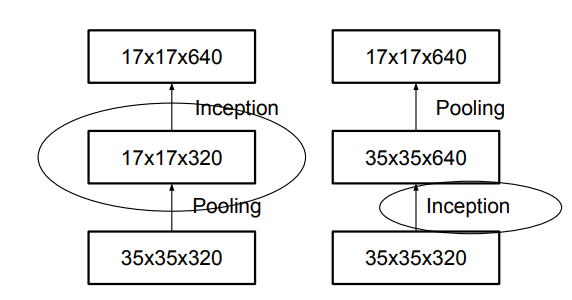

즉, 3x3 conv+stride 1 -> 3x3 conv+stride 2 -> 그다음 concat (= conv 5x5랑 같으면서 stride 크게 해서 연산량 줄임)

이때, 3x3 conv+stride 2 이런 기법은 AlexNet의 overlapping 풀링임.

따라서 이렇게 쪼개서 쓰던가, ResNet처럼 초반에 풀링해라!


++ 이미 2014년에 풀링의 문제점이 제기되어서 ResNet만 보더라도 첫 번째 layer에 크기 급격하게 줄이려고 풀링 한번 쓰고 이후로 없음. (첫 번째 layer가 가장 사이즈가 크니까 연산량이 복잡한데, 앞에 있는 layer의 정보보단 (점선면) 뒤에 있는 non-linear 정보가 중요하니까

=> 즉, 풀링하면 정보를 많이 잃어버린다는 문제점이 있음. 그런데 중요한 정보를 잃어버리는 것보다는 점선면과 별 거 아닌 특징을 가지고 있는 초반 layer의 정보를 잃어버리는 게 낫다는 뜻!


=> 따라서 딥러닝에서 풀링을 뒤에 쓰면 그냥.. 머리 박고 반성해야함..ㅎㅎ 




---



### **InceptionV2 구조**
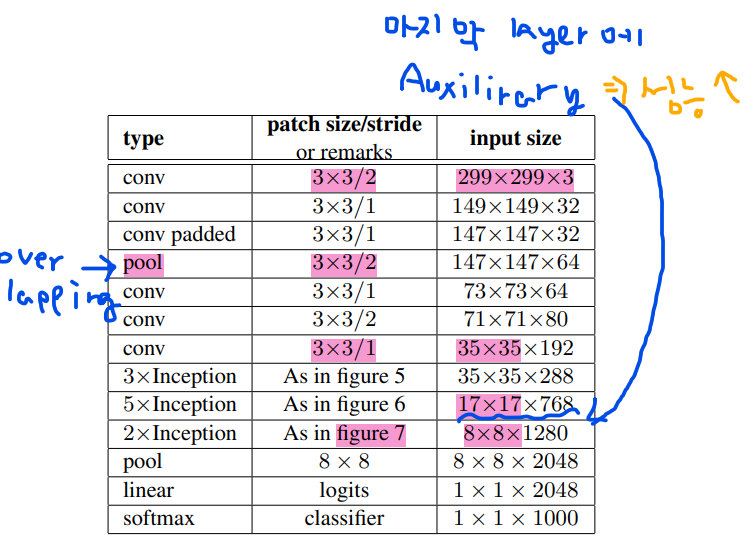

input size를 299x299로 바꿈. 그리고 conv를 3x3 str 2씀. (스트라이드 트릭)

pool conv 3x3 str 2는 오버래핑 풀링.

8x8만들기 위해서 figure7처럼 쪼개서 쓴다.

Auxiliary classifier를 후반에 써서 성능 조금 올림.




---


++ 2014~2015년에 다른 논문에서도 아주 다양한 기법이 발전함. Inception에 잘 적용되는지 확인해봄.

**1) Label Smoothing**

우리가 클래시피케이션 문제에서 cross entropy를 사용할 때 문제점이 있을 수 있음. 라벨스무딩 식 보면 크로스엔트로피 식이랑 똑같음.

크로스엔트로피를 왜 쓰느냐? 만약에 classification에서 MSE를 쓰면 (1-0.3)^2이런 식으로 모든것을 다 계산해야하는데, 타겟을 맞추는데 집중하지 않고 틀린 답까지 같이 고려해서 뚜렷한 답을 내놓기 어려움. 그런데 크로스엔트로피 기법을 사용하면 답이 아닌 나머지는 다 0을 곱하기 때문에 정답에 집중할 수 있음.

그런데 원핫인코딩을 썼기 때문에 0 or 1인 극단적인 값이 나오는데, 현실에선 항상 100%확신을 가질 수 없음. 따라서 정답을 1이 아니라 조금 스무딩해서 0.8 이런식으로 표현하자. 그러면 일반적으로 오버피팅(일반화)가 더 잘된다고 알려져있음. 원인은 모름. 이 당시엔 그냥 해보니까 잘 됨. 이에 관한 아주 멋진 논문을 2019년 Hitton이 냄. 어떤 상황에서 스무딩하면 좋을지!. 이건 후에 러닝테크닉에서 다루겠음.

1000개 클래스면 1/1000이니까 어떤 계수랑 곱해서 1을 조금 더 스무딩 시키자~. 따라서 극단적인 값이 아닌 부드럽게 만들자~ 이게 어디에 많이 쓰였다!? 크로스엔트로피!


In [ ]:
tf.keras.losses.BinaryCrossentropy

하이퍼파라미터에 label_smoothing 있음!

=> 이걸 inceptionV2에 갖다 붙임.


**2) 학습 테크닉. Training Methodology**

분산학습 써봤다 100에폭 32배치로. .

그리고 그 당시 유행한 학습 테크닉인 RMSProp, 그래디언트클래핑, 디케이 등 써봤다.

**3) input size 299로 조정**

상식상 해상도가 높으면 높을수록 명확하게 구분되니까 좋음. 299로 늘렸다.

따라서 299가 넘 크니까 첫 번째 레이어에 풀링 쓰고 stride 2

인풋을 79로 테스트 했을 땐 풀링 안 씀.


(Table3에 이제 막 테크닉 비교한 테이블 있음.)

결과적으로 inceptionV2+BN+Auxiliary.

inceptionV3는 뭐다? InceptionV2 구조에 이런 테크닉을 붙여서 조금 더 성능 끌어올린 것.

그래서 텐서플로가 V2는 지원하지 않음.


**4) V3의 크롭테크닉**

그냥 inceptionV3 자체가 성능이 엄청 좋다..~ 

그런데 여기서 찝찝한 게 하나 있음 2015년에 이미 ResNet이 있었음. 그런데 V3에 shortcut connection을 붙이지 않음. (아직 증명되지 않아서 안 쓴 듯)

하지만 앙상블만 있다면 shortcut connection없이도 ResNet을 뛰어넘을 수 있다!


## General Design Principles

이 논문 처음 2장에 일반적인 디자인 원칙을 논함. 

아주 스케일이 큰 실험을 통해 다양한 아키텍처를 구현하며 네가지 원칙을 발견했다. 증명되지 않아서 100% 좋다는 건 아니지만 경험상 아래 원칙을 통해 V2, V3를 만들었다. 


1) Representation Bottleneck

가능한 정보를 유지하면서 줄여라.

V2에 썼던 테크닉들을 이야기 하고 있음. 

2) higher dimensional representation이 네트워크 안에 로컬로 처리하기 쉽다

 말 더럽게 어렵게 썼는데, 차원이 큰 애들은 (예를들어 299x299)는 로컬리한 정보이기 때문에 풀링을 쓰든 뭘 하든 확 줄여도 된다. (  첫 번째 layer에서 풀링하는 거)
 
 다만 뒤로 갈수록 글로벌 정보라서 이땐 풀링 안돼~!


3) spatial aggregation

차원축소를 하면 정보를 덜 잃을 것이다. => convolution 연산을 의미함. 즉, 컨볼루션 연산을 통한 결과값 
차원축소 할 동안 정보를 훨씬 덜 잃어버릴 것이다.

만약 output이 spatial aggregation context에서 사용된다면 차원 감소 동안 정보 손실이 훨씬 적다는 것. 결국 차원 축소는 더 빠른 학습을 촉진함.

4) 적당한 depth (layer개수), 적당한 width(컨볼루션 수)를 정해라.

=> 이건 추후에 EfficientNet에서 다룸.




---



# [2016 InceptionV4 ] Inception-v4, Inception-ResNet and the Impact of Residual Connections on Learning

InceptionV3에 ResNet 기반 구조를 써보자

결론적으로 Inception이 짐. 2016년 후반~2017년도엔 ResNet 기반 모델이 쏟아지기 시작함. 왜냐? ResNet이 정말 심플해서 이해하기도 쉽고 커스터마이징도 쉬움. 반면 Inception, 온갖 테크닉 다 쓰면서 엄청 더러움.

Abstract: 야~ 그래도 우리 InceptionV3가 ResNet이랑 비슷해,,~ 그런데 실제 이 두 짱들의 핵심적인 차이인 Redisual을 Inception에 붙이면 어떻게 될까? 

InceptionV4 = Inception + ResNet

=> 학습 속도가 빨라짐 (당연함. Residual connection의 고유 속성임)

Residual inception이 유사하게 처리하면서도 비용이 크게 드는 애들보다 성능이 좋더라~ 그런데 Residual connection을 쓰지 않은 Inception보단 약간! 성능이 좋더라~ 하면서 계속 inception이 쓰레기는 아니라는 것을 강조함.

그런데 결론적으로 **InceptionV4는 Residual connection을 쓰진 않음..**

-> 엥 아깐 썼다며?ㅡㅡ 이제 얘기해볼게~


InceptionV4를 위해 구조를 두개 만들었음. Inception 모듈 & Reduction 모듈. 

## 1) Residual connection
 
ResNet은 곡선 파트가 shorcut 커넥션인 반면 아이덴티티 논문(다른 논문 있음..)은 직선이 shortcut connection임. 뭐 이런 여러가지 변형판이 많이 나옴. 아무튼 1x1 conv(bottle neck 때문에)로 변형 시켜서 인셉션에 붙임.


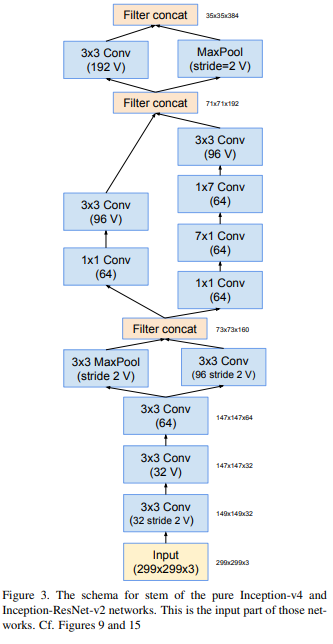

shortcut connection의 변형판을 가져다 붙임. (조금 다르지만 비슷하게 붙임.) 

**=> redisual inception block**

## 2) Inception block

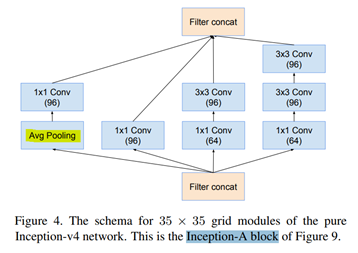

grid 35x35를 썼던 inception-v1엔 max pooling 써놓고 여기선 Avg Pooling으로 바꿈. 경험적으로 Avg Pooling 썼더니 성능이 더 좋았기 때문임..ㅎㅎ

**=> inception-A 구조**

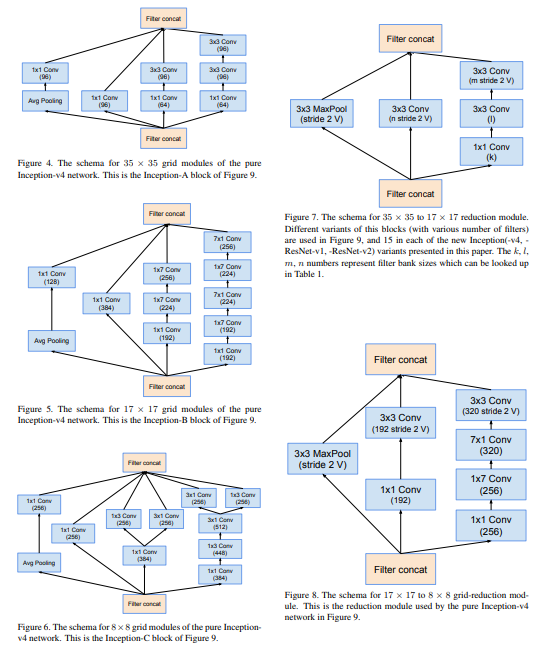

**3) figure5. inception-B**

inception V2에서 n=7을 사용해서 결과적으로 grid 17x17 나오게 한 구조가 있음..(V2논문의 figure6 참고)

**4) figure6. inception-C**
inception V2에서 결과적으로 grid 8x8 나오게 한 구조가 있음..(V2논문의 figure7 참고)

**5) Reduction : 차원축소 모듈**

inceptionV2에서 첫 번째 원칙인 representation bottleneck이 갑자기 줄면 정보를 많이 잃으니까 가능한 정보를 잃지 않게 줄이자!! +  V2의 fig9.

fig9의 왼쪽은 representation bottleneck에 대한 문제, 오른쪽은 연산량에 관한 그림임.

**정보를 가능한 유지하며 줄이기 위해 차원을 증가시키고 나서 pooling**을 쓰면 되는데, 이건 연산량이 복잡하다 했었음 => V2의 fig10.

크기를 줄이지만 즉, 필터크기는 다양한 변형판이 많지만, **35x35에서 17x17로 줄일 때 가장 연산량 줄이면서도 정보 유지한다!!**

6) fig8. pure inception인 fig7을 약간 변형 시킴. 

**Fig9) V4의 구조를 설명함.**

229x299의 stem(스태킹 시작 전 부분)을 가지며, fig3에 있음.. V1에서 Local Response Normalization(LRN) 뺌,

4개의 inceptionA를 반복,

그리고 reduction A로 차원 축소하고,

inceptopn B 7개,

and...~ 막판 softmax 직전에 drop out 썼는데, 왜 썼는진 안 나와있음.

자기들이 BN 쓰면 드롭아웃 없어도 된다고 해놓고 드롭아웃 쓴 거 보니 batch normalization을 빡세게 쓰지 않았다는 것을 우리는 알 수 있음..

(왜 이렇게 했는지는 저자들도 딱히 이유가 없음. 그냥 성능이 좋아서 그런 것임. 이게 블랙박스라 불리는 이유임.)

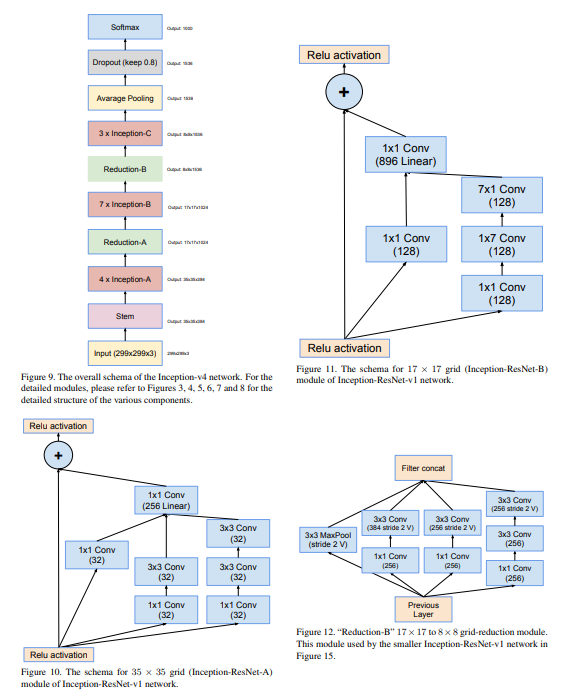

## 3) inception - resnet

fig10부턴 Inception - Resnet 구조임.

fig10) Residual block은 기본적으로 ADD를 사용함. 즉, F(x) + x 개념.

그림을 보면 구조를 더하는 게 아니라 inception구조에 shortcut shorcut의 값을 더하는 add 구조임을 알 수 있음!! 

++ add와 concat의 차이

=> add는 모양이 같아야함. 

In [8]:
a = np.arange(24).reshape(2,3,4)
b = np.arange(24).reshape(2,3,4)

In [5]:
a+b # => 각각 엘리멘트 값을 더함 따라서 shape이 (2,3,4)

array([[[ 0,  2,  4,  6],
        [ 8, 10, 12, 14],
        [16, 18, 20, 22]],

       [[24, 26, 28, 30],
        [32, 34, 36, 38],
        [40, 42, 44, 46]]])

In [12]:
np.concatenate((a,b)) # => (4,3,4)  axis=0이 디폴트라 0번째 구조를 더함.

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]],

       [[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [13]:
np.concatenate((a,b), axis=2) 
# axis=2하면 2번째 구조를 더함. (2,3,8)됨. 1하면 (2,6,4)되겠지.
# 즉 구조를 갖다붙이는 게 concat임.

array([[[ 0,  1,  2,  3,  0,  1,  2,  3],
        [ 4,  5,  6,  7,  4,  5,  6,  7],
        [ 8,  9, 10, 11,  8,  9, 10, 11]],

       [[12, 13, 14, 15, 12, 13, 14, 15],
        [16, 17, 18, 19, 16, 17, 18, 19],
        [20, 21, 22, 23, 20, 21, 22, 23]]])

**fig11) InceptionV1 + Resnet**

**fig12) reduction**

concat임.
residual block이 없음. (resnet 구조에 점선 부분)

128->256 차원이 증가할 때 쓰는 구조로 dot shortcut 부분.

그런데 fig12에선 숏컷 커넥션 안 씀

fig15) 인셉션-레스넷 V1의 구조임.

인셉션 레스넷V1이랑 V2의 차이가 뭐냐? 큰 구조는 같은데;;; => 내부적으로 쓴 게 다름.. 뭐 fig4,5,6, 이런거... 약간 차이나게 씀..

- inceptionV4구조에 resnet 붙인 게 inception-resnetV2
- inceptionV3구조에 resnet 붙인 게 inception-resnetV1
- 따라서 텐서플로에는 V3와 inception-resnetV2만 제공함.




---

실험결과:

momentum decay: 0.9,  RMSProb 전부 인셉션 V2에서 쓴 거 그대로 가져다 씀.(학습 테크닉도 딱히 V2랑 다른 게 없음)

결과를 보면, Resnet shorcut connection 붙인 게 학습 속도는 빠름. 그런데 fig24를 보면 성능은 거의 비슷함. 따라서 텐서플로에서는 inception-resnetV2만 살림!!

fig25. 위에 두개가 짝꿍이고 아래 두개가 짝꿍임. 확실히 비슷해보이지만 resnet 붙은 것들이 학습 속도는 빨랐으며, 최종 성능은 비슷함.

그런데 왜 저렇게 만들었는가는 역시나 없음. 걍 실험적인 결과라 앱스트랙에서도 empirical 하다고 표현함. 
결론적으로 두 짝지씩 조금씩 미묘하지만 결론적으로 비슷하다~

conclusions:

- inception resnet V1은 inceptionV3 
- inceptionV4는 inception resnet V2의 퓨어버전.

결국 이 논문의 목적이었던, 갖다 붙였을 때 어땠을지 궁금했는데 실험 결과상 트레이닝 스피드는 빨랏지만 성능의 큰 효과는 없더라~

inception resnet V2는 성능이 가장 좋았지만, 모델 사이즈가 넘 컸다!!

## 정리


V4는 설명자체가 별로 없기 때문에 논문에서 중요한 부분만 찝어보면..


3.3 redisual scaling.

만약 필터의 수가 1000개를 넘어간다면 수렴이 안정적으로 되지 않고 트레이닝 초기에 "died" 했다. (ZFNet의 데드 뉴런)

=> 인셉션V2의 네번째 원칙인 '네트워크의 W와 D를 적절히 해라.'와 일맥상통함. 넘 크면 죽음.

그런데 이러한 현상은 사실 Resnet에서도 사실 발견된 것임. 따라서 Resnet에서 learning rate를 작게 했다가 천천히 증가시키는 워밍업 테크닉을 썼다. (2018년 근처에 많이 썼던 기법들에 learing rate warming up이란 게 있음.)

- 아무튼 필터 개수가 1000개 이상이면 데드하는 현상이 생겼고, 워밍업같은 테크닉이 필요했다.!!! (추후에 다루겠음..)
- residual block은 결과적으로 성능 향상은 별로 없었지만 빨리 수렴시키더라. 
  
  하지만 필터 크기가 클 때는 학습이 잘 안 되더라 (fig25보면 연두색 그래프 지 혼자 수렴 안 되고 일정함)

## 인셉션 최종 구조

https://keras.io/api/applications/


V3와 V4의 변형판에서 V4가 더 expensive 했음. V3은 V1과 대응되고 V4는 V2와 대응됨.

어떤 걸 선택하느냐? => inception-resnet이 절대적으로 성능이 좋음. 

Nasnet, Efficient은 강화학습 기반인데 이걸 포함시키더라도 인셉션 구조가 절대적으로 vision transformer 최신 기법과 비교해도 나쁜 편이 아님.

심지어 모델 사이즈가 VGG보다 작고 성능도 10%나 좋음. 파라미터 수도 적어서 데이터도 적게 필요함! 그런데 모델이 복잡해!

**그렇다면 inceptionV3의 장점이 뭘까?**

=> CPU 환경에서 속도가 resnet 구조보다 훨씬 빠름!! 


왜냐면 shortcut 구조가 속도를 많이 잡아먹기 때문임. 즉 CPU 환경에서 인셉션이 그렇게 나쁜 선택사항은 아님. shortcut 구조를 쓴 inception-resnet V2를 보면 CPU에서 속도를 엄청 잡아먹고, GPU에서도 그닥 빠르지 않음. 

너무 복잡해서 동시병행 처리가 안 되기 때문임.

따라서 InceptionV3가 CPU 환경에서 훨씬 좋음. MobileNet같은 경량화 모델이 당연 더 빠르긴하지만 얘넨 성능이 낮다는 결정적 단점이 있음.


**InceptionResNetV2 vs InceptionV3**

In [ ]:
in4 = tf.keras.applications.InceptionResNetV2()
tf.keras.utils.plot_model(in4)

모델도 엄~청 복잡함. 단독 구조에서는 괜찮지만 transfer learning 하기엔 무리다.

In [ ]:
in3 = tf.keras.applications.InceptionV3()
tf.keras.utils.plot_model(in3)

훨씬 간단하고 절대적 성능도 괜찮은 편이다. 그래서 아직도 쓰인다. 

concat하지 않고 add 해서 파라미터가 상대적으로 작고, CPU 연산에 최적화 됐다.

 그래서 우리의 중요 옵션 중에 하나로 기억하기!!~!~!
